## Train a model

In [1]:
from train_nep.config import get_nep_config
from train_nep.dataset import StructureDataset, collate_fn
from train_nep.model import NEP
from train_nep.trainer import Trainer
from torch.utils.data import DataLoader
from wizard.io import read_xyz

para = get_nep_config()
frames = read_xyz("../Repository/PbTe/train.xyz")

train_dataset = StructureDataset(frames=frames, para=para)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True, collate_fn=collate_fn)

model = NEP(para)
training = Trainer(
    model=model,
    training_set=train_loader,
    save_path="../Repository/PbTe/nep_model.pt",
    use_wandb= True
)
training.fit(epochs=500)

wandb: Currently logged in as: 602585882 (train_nep) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Number of Epoch: 500
Devices: cpu
Number of Parameters: 1981
--------------------------------------------------
  [Batch 1] Loss = 4.070980 | Energy = 3.809591 | Forces = 0.261389 | Virial = 0.000000
  [Batch 2] Loss = 4.056658 | Energy = 3.713854 | Forces = 0.342804 | Virial = 0.000000
  [Batch 3] Loss = 3.978771 | Energy = 3.670656 | Forces = 0.308115 | Virial = 0.000000
  [Batch 4] Loss = 3.941859 | Energy = 3.609019 | Forces = 0.332841 | Virial = 0.000000
  [Batch 5] Loss = 3.883529 | Energy = 3.565959 | Forces = 0.317570 | Virial = 0.000000
Epoch   1/500: Train Loss = 3.986360 | Energy = 3.673816 | Forces = 0.312544 | Virial = 0.000000
  [Batch 1] Loss = 3.787445 | Energy = 3.534608 | Forces = 0.252837 | Virial = 0.000000
  [Batch 2] Loss = 3.765854 | Energy = 3.433942 | Forces = 0.331912 | Virial = 0.000000
  [Batch 3] Loss = 3.711904 | Energy = 3.380473 | Forces = 0.331431 | Virial = 0.000000
  [Batch 4] Loss = 3.612289 | Energy = 3.348862 | Forces = 0.263426 | Virial = 0.000000

Loss/train_energy,█▆▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss/train_forces,█▄▄▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss/train_total,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss/train_virial,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇█████
Loss/train_energy,0.01088
Loss/train_forces,0.1083
Loss/train_total,0.11919
Loss/train_virial,0
epoch,500



completed!


In [5]:
from train_nep.config import get_nep_config
from train_nep.dataset import StructureDataset, collate_fn
from train_nep.model import NEP
from train_nep.snes import SNES
from torch.utils.data import DataLoader
from wizard.io import read_xyz

para = get_nep_config()
frames = read_xyz("../Repository/PbTe/train.xyz")

train_dataset = StructureDataset(frames=frames, para=para)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True, collate_fn=collate_fn)

model = NEP(para)
training = SNES(
    model=model,
    training_set=train_loader,
    save_path="../Repository/PbTe/nep_snes.pt",
    population_size=40
)

training.fit(generations=500)

Generation 500
Devices: cpu
Number of Parameters: 1981
Population Size: 40
--------------------------------------------------
Gen    1/500: Best = 2.548638 | Mean = 3.682802 | Std = 0.401951 | Sigma_mean = 0.099962
Gen    2/500: Best = 2.847300 | Mean = 3.681155 | Std = 0.380952 | Sigma_mean = 0.099979
Gen    3/500: Best = 2.969183 | Mean = 3.641365 | Std = 0.387265 | Sigma_mean = 0.100021
Gen    4/500: Best = 2.518028 | Mean = 3.511536 | Std = 0.482550 | Sigma_mean = 0.100027
Gen    5/500: Best = 2.892020 | Mean = 3.645805 | Std = 0.407260 | Sigma_mean = 0.100058
Gen    6/500: Best = 2.927699 | Mean = 3.577879 | Std = 0.355357 | Sigma_mean = 0.100003
Gen    7/500: Best = 3.008137 | Mean = 3.730473 | Std = 0.398089 | Sigma_mean = 0.100025
Gen    8/500: Best = 2.706871 | Mean = 3.528590 | Std = 0.387559 | Sigma_mean = 0.100008
Gen    9/500: Best = 2.540933 | Mean = 3.679914 | Std = 0.487786 | Sigma_mean = 0.099961
Gen   10/500: Best = 2.476302 | Mean = 3.761463 | Std = 0.428191 | Sigma_

## Compare Model

25
SNES_E_rmse: 2085.79 meV/atom
SNES_F_rmse: 305.51 meV/Å
Adam_E_rmse: 15.45 meV/atom
Adam_F_rmse: 160.91 meV/Å


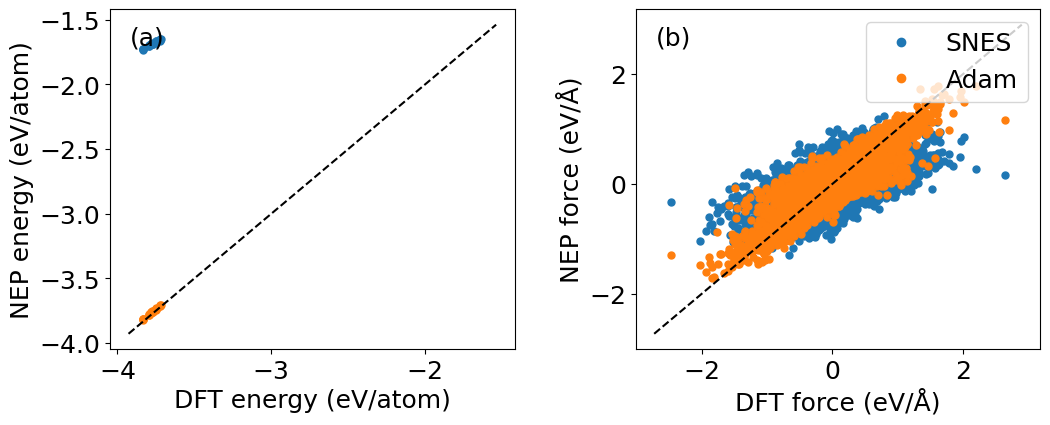

In [6]:
from wizard.io import read_xyz, plot_force_results
from train_nep.interface import NEPCalculator
%matplotlib inline

frames = read_xyz("../Repository/PbTe/train.xyz")
calc1 = NEPCalculator("../Repository/PbTe/nep_snes.pt")
calc2 = NEPCalculator("../Repository/PbTe/nep_model.pt")
calcs = [calc1, calc2]
plot_force_results(frames, calcs, ['SNES', 'Adam'])

## Extract Model

In [ ]:
from train_nep.model import NEP

nep = NEP.from_checkpoint("../Repository/PbTe/nep_model.pt")
nep.print_model_info()
nep.save_to_nep_format("../Repository/PbTe/nep_torch.txt")